<a href="https://colab.research.google.com/github/PiotMik/CaseWeek/blob/main/002_Code/Yield_Curve_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantitative analysis of yield curve behaviour using Machine Learning

#### Kraków, 12.05.2023
#### Case Week, AGH

# Intro

## Purpose
In this workshop, we present the topic of dimensionality reduction for yield curves. 

## Method
This notebook is meant as a guided tour of Python, data analysis & Machine Learning; so we prepared small coding exercises which will take you from data loading, through modeling up to running a full model.  
Try completing the exercises on your own. In case you're stuck, we each exercise is provided with *Resources* links, which you can use to help you. If you need a bit more guidance, you can use the *Hints* below each exercise, where we give the outline of the code. Lastly, if none of the above worked - feel free to check out the *Solutions* section at the end of the notebook.

## Goal
After finishing this notebook, you will implement a Machine Learning model, which projects the yield curve onto a lower-dimensional space, where it performs outlier detection.


Sounds exciting? Great, hope you have fun! 😃




---



In [ ]:
%matplotlib inline
! python --version

Python 3.10.11


# Data

Daily data on [UK government bond yields](https://www.bankofengland.co.uk/statistics/yield-curves) are publicly available on the Bank of England website

## Exercise 1: 
1. Download the data archive called "*Daily government liability curve (nominal)*"
2. Open and familiarize with "*GLC Nominal daily data_2016 to present*"
3. Use Excel to prepare a csv dataset
4. Drop to Collab

## Exercise 2:
1. Read the data into python.
2. Display a part of the dataframe
3. Format the index into a proper date index
4. Format the column names into `0.5Y, 1.0Y, ...`

Resources: [Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), [Reading data](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html), [Dealing with dates](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

###Hints:

In [ ]:
# import pandas as pd
# data_path = ...
# rates = pd.read_csv(..., index_col= ...)

# rates.index = pd.to_datetime(..., format = ...)
# rates.columns = [... for n in rates.columns]
# rates.head()

## Exercise 3:
1. What percentage of NaNs are there in each column?
2. Drop the problematic column
3. Drop the rows with NaNs

Resources: [NaNs detection](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html), [Columns/rows dropping](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html), [Dropping NaNs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

### Hints:

In [ ]:
# rates.isna()
# rates.isna().mean().sort_values()

In [ ]:
# rates = rates.drop(... , axis = ...) 
# rates = rates.dropna(how = ...)

## Exercise 4:
1. Plot the 1Y, 5Y, 10Y tenors
2. Plot the yield curve as of the latest available date
3. Add title, axis labels

Optional:
3. Plot the yield curve as of the 5 latest available dates
4. Plot the yield curve as of 5 random dates

Resources: [Plotting with pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

### Hints:

In [ ]:
# import matplotlib.pyplot as plt
# rates[[...]].plot()
# plt.xlabel(...)
# plt.ylabel(...)
# plt.title(...)

# rates.tail(...)
# rates.sample(...)

# Principal Component Analysis



## Exercise 5
1. Compute the correlation matrix of the rates
2. Visualize a heatmap of the correlations

Resources: [Correlation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html), [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

### Hints:

In [ ]:
# import seaborn as sns

# corr_matrix = rates.corr()
# sns.heatmap(...)

## Exercise 6
1. Build a `sklearn` pipeline composed of a scaling step, and a PCA step
2. Fit to the data

Resources: [Pipeline](https://scikit-learn.org/stable/modules/compose.html), [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

### Hints:

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA 
# from sklearn.pipeline import Pipeline

# model = Pipeline([(..., ...),
#                   (..., ...)])

# model.fit(...)

## Exercise 7
1. Look at the explained variance ratio
2. Visualize the cumulative explained variance ratio (e.g. lineplot)
3. Visualize the explained variance ratio (e.g. barplot)
4. How many Principal Components would you use?

### Hints:


In [ ]:
# explained_variance = model[...].explained_variance_ratio_
# plt.plot(explained_variance.cumsum())

In [ ]:
# plt.bar(range(5), explained_variance[:5])

## Exercise 8
1. Rebuild the model using 3 principal components
2. Transform rates into the lower dimension
3. Display the transformed data

Resources: [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

### Hints:


In [ ]:
# Check PCA documentation for argument corresponding to number of principal components

# model = Pipeline([(..., ...),
#                   (..., PCA(... = 3))])

# model.fit(...)
# transformed = model.transform(...)  <-- this will be a numerical array!
# transformed = pd.DataFrame(transformed, index = ..., columns = ...)
# transformed.head()
# transformed.plot()

## Exercise 9
1. Obtain the components from the fitted model
2. Plot them on a common graph 
3. What do they tell us/represent?

Resources: [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

### Hints:

In [ ]:
# components = model[...].components_
# plt.plot(...)

## Exercise 10
* Get the transformed data for `'2023-04-28'`
* Get the PCA components matrix
* Reconstruct the yield curve
* Get the actual yield curve for `'2023-04-28'` and compare with the modelled one

### Hints:

In [ ]:
## Matrix multiplication in python:
# A @ B

## Checking shape of dataframe, in case you need it:
# A.shape


# date = ...
# transformed_data = rates_pca.loc[...]
# pca_components = model[...].components_


## Reconstructing the curve:

# modelled_curve_scaled =  ... @ ...
# modelled_curve_original_scale = model[...].inverse_transform(...)
# modelled_curve_original_scale = pd.DataFrame(..., index = ..., columns = ...)


## Plotting

# actual_curve = rates.loc[...]

# fig, ax = plt.subplots()
# (...).T.plot(ax = ax)
# (...).T.plot(ax = ax)
# ax.legend(['Reconstructed', 'Actual'])

# Outlier detection

## Exercise 11
1. Enhance the model, by adding an outlier detection step
2. Use `IsolationForest` to find 1% of "weirdest" curves
3. For reproducibility, use `random_state = 20230512`
4. Fit it on the data

Resources: [Isolation Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)

### Hints:

In [ ]:
# from sklearn.ensemble import IsolationForest

# clf = Pipeline([(..., ...),
#                 (..., ...),
#                 (..., ...(... = 0.01, ... = 20230512))])
# clf.fit(...)

## Exercise 12
1. Predict the labels (outlier vs non-outlier)
2. Get the dates of outliers
3. Plot the non-outlier curves in grey
4. Plot the outlier curves in red

### Hints:

In [ ]:
# labels = (...).predict(...)
# outlier_dates = rates.index[labels == ...]

# non_outlier_curves = (...).drop(..., axis = ...)
# outlier_curves = (...).loc[...]

# fig, ax = plt.subplots()
# non_outlier_curves.T.plot(ax = ..., legend=False, color = ..., alpha = 0.1)
# outlier_curves.T.plot(ax = ..., legend=False, color = ..., alpha = 0.2)


# Solutions
---



In [ ]:
import pandas as pd
data_path = "/content/uk_govie_spots.csv"
rates = pd.read_csv(data_path, index_col= 0)

rates.index = pd.to_datetime(rates.index, format = "%d/%m/%Y")
rates.columns = [f"{n}Y" for n in rates.columns]
rates.head()

,0.5Y,1.0Y,1.5Y,2.0Y,2.5Y,3.0Y,3.5Y,4.0Y,4.5Y,5.0Y,...,35.5Y,36.0Y,36.5Y,37.0Y,37.5Y,38.0Y,38.5Y,39.0Y,39.5Y,40.0Y
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,0.343417,0.469762,0.611093,0.750127,0.879897,0.998858,1.107422,1.206596,1.297485,...,2.551816,2.540093,2.528709,2.517713,2.507147,2.497049,2.487450,2.478377,2.469853,2.461895
2016-01-05,NaN,0.326072,0.452016,0.593339,0.732392,0.862314,0.981657,1.090866,1.190934,1.282928,...,2.547222,2.535446,2.524007,2.512953,2.502328,2.492170,2.482511,2.473379,2.464796,2.456780
2016-01-06,NaN,0.293395,0.401197,0.534982,0.670284,0.797753,0.915034,1.022254,1.120310,1.210266,...,2.479657,2.467708,2.456107,2.444901,2.434137,2.423852,2.414078,2.404845,2.396174,2.388084
2016-01-07,NaN,0.306486,0.411970,0.540998,0.672406,0.797378,0.913423,1.020404,1.118953,1.209917,...,2.519596,2.507792,2.496322,2.485236,2.474578,2.464386,2.454692,2.445526,2.436909,2.428860
2016-01-08,NaN,0.305554,0.398851,0.518128,0.642686,0.763028,0.876001,0.980996,1.078318,1.168597,...,2.500580,2.488660,2.477077,2.465879,2.455112,2.444813,2.435017,2.425751,2.417038,2.408896


In [ ]:
rates.isna().mean().sort_values()

20.0Y    0.031414
29.0Y    0.031414
28.5Y    0.031414
28.0Y    0.031414
27.5Y    0.031414
           ...   
12.0Y    0.031414
11.5Y    0.031414
11.0Y    0.031414
39.5Y    0.031414
0.5Y     0.405759
Length: 80, dtype: float64

In [ ]:
rates = rates.drop(['0.5Y'], axis = 1).dropna()

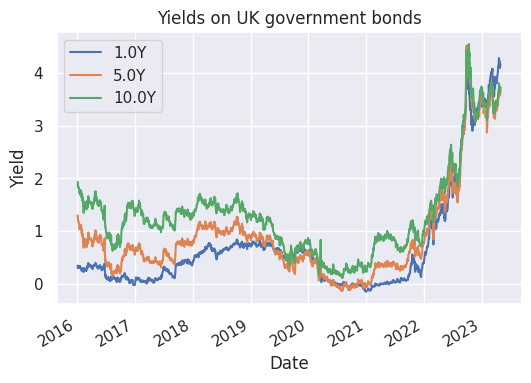

In [ ]:
import matplotlib.pyplot as plt

_ = rates[['1.0Y', '5.0Y', '10.0Y']].plot(xlabel = 'Date', ylabel = 'Yield', 
                                          title = "Yields on UK government bonds")

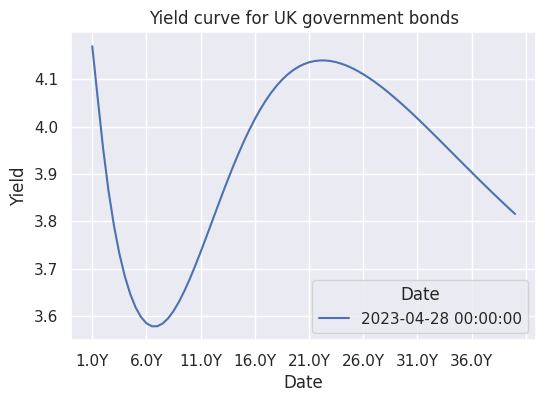

In [ ]:
_ = rates.tail(1).T.plot(xlabel = 'Date', ylabel = 'Yield', 
                         title = "Yield curve for UK government bonds")

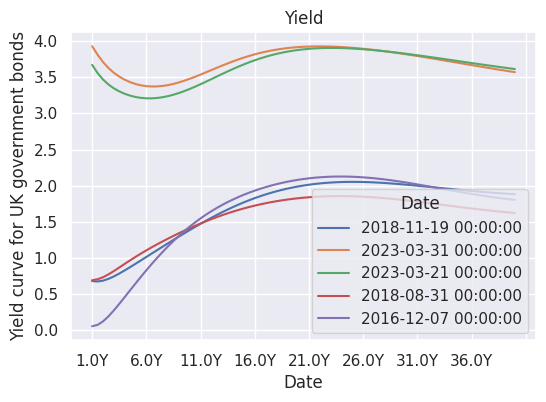

In [ ]:
_ = rates.sample(5).T.plot(title = 'Yield', xlabel='Date', 
                           ylabel = "Yield curve for UK government bonds")

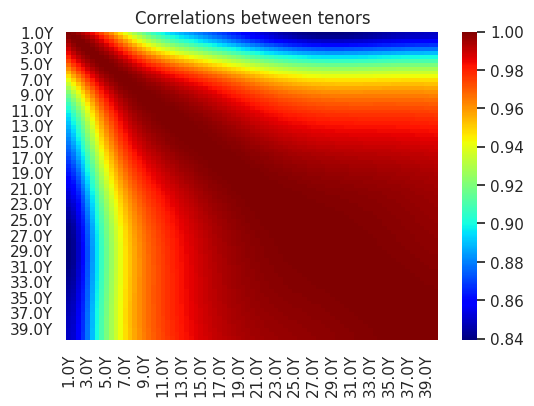

In [ ]:
import seaborn as sns
sns.heatmap(rates.corr(), cmap='jet')
_ = plt.title('Correlations between tenors')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline

model = Pipeline([('scaling', StandardScaler()),
                  ('pca', PCA())])

model.fit(rates)

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA())])

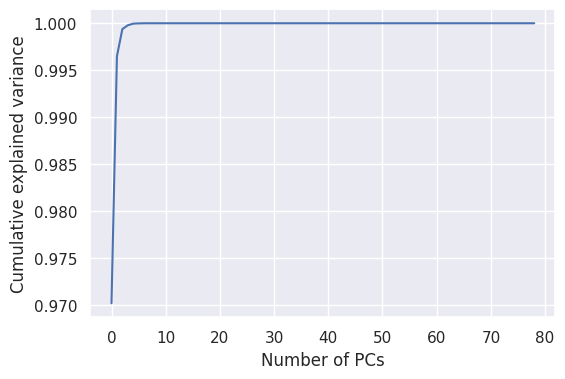

In [ ]:
plt.plot(model['pca'].explained_variance_ratio_.cumsum())
plt.ylabel('Cumulative explained variance')
_ = plt.xlabel('Number of PCs')

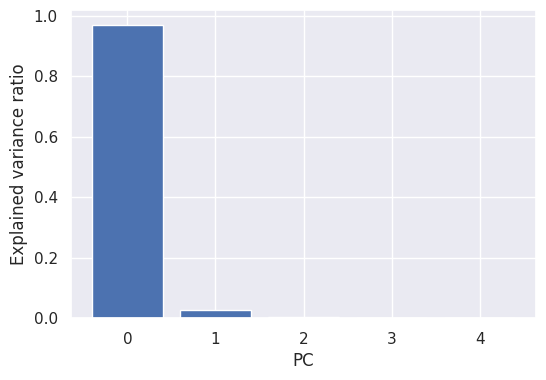

In [ ]:
plt.bar(range(5), model['pca'].explained_variance_ratio_[:5])
plt.ylabel('Explained variance ratio')
_ = plt.xlabel('PC')

In [ ]:
model3 = Pipeline([('scaling', StandardScaler()),
                   ('pca', PCA(n_components=3))])
model3.fit(rates)

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=3))])

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

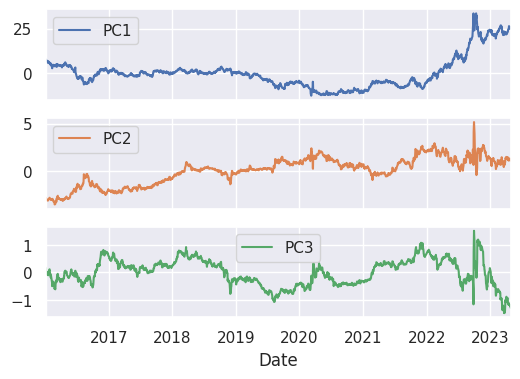

In [ ]:
rates_pca = pd.DataFrame(model3.transform(rates), 
                         index = rates.index,
                         columns = ['PC1', 'PC2', 'PC3'])
rates_pca.plot(subplots=True)

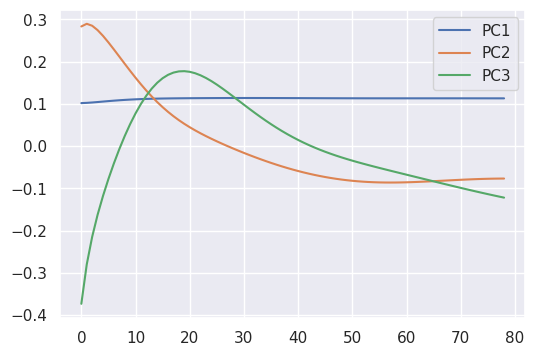

In [ ]:
plt.plot(model3['pca'].components_.T)
_ = plt.legend(['PC1', 'PC2', 'PC3'])

In [ ]:
i = '2023-04-28'
transformed_data = rates_pca.loc[[i], :]
pca_components = model3['pca'].components_

reconstructed_curve_scaled =  transformed_data @ pca_components
reconstructed_curve_original = model3['scaling'].inverse_transform(reconstructed_curve_scaled)
reconstructed_curve_original = pd.DataFrame(reconstructed_curve_original,
                                            index = transformed_data.index,
                                            columns = rates.columns)

reconstructed_curve_original

,1.0Y,1.5Y,2.0Y,2.5Y,3.0Y,3.5Y,4.0Y,4.5Y,5.0Y,5.5Y,...,35.5Y,36.0Y,36.5Y,37.0Y,37.5Y,38.0Y,38.5Y,39.0Y,39.5Y,40.0Y
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-28,4.117944,4.041684,3.956361,3.881558,3.818724,3.765686,3.720306,3.681329,3.648278,3.621077,...,3.89176,3.878983,3.86643,3.854116,3.842053,3.83025,3.818714,3.807448,3.796456,3.785738


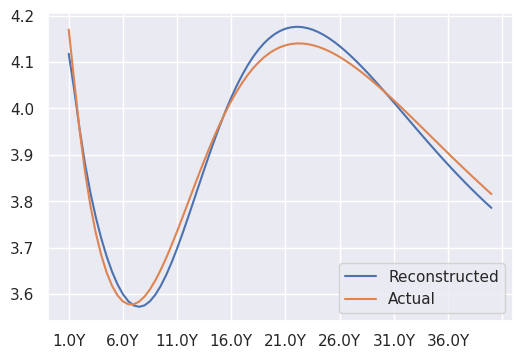

In [ ]:
actual_curve = rates.loc[[i], :]

fig, ax = plt.subplots()
reconstructed_curve_original.T.plot(ax = ax)
actual_curve.T.plot(ax = ax)

ax.legend(['Reconstructed', 'Actual'])

In [ ]:
from sklearn.ensemble import IsolationForest

clf = Pipeline([('scaling', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('classifier', IsolationForest(contamination = 0.01, 
                                               random_state=20230512))])
clf.fit(rates)

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier',
                 IsolationForest(contamination=0.01, random_state=20230512))])

<Axes: >

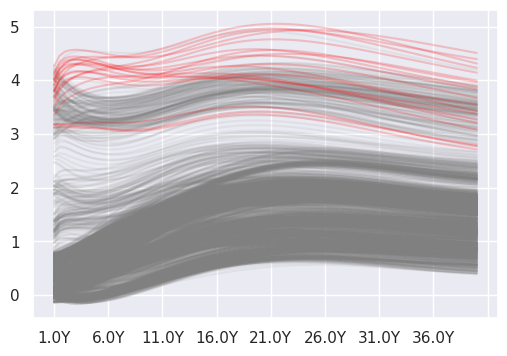

In [ ]:
labels = clf.predict(rates)
outlier_dates = rates.index[labels == -1]

non_outlier_curves = rates.drop(outlier_dates, axis = 0)
outlier_curves = rates.loc[outlier_dates]

fig, ax = plt.subplots()
non_outlier_curves.T.plot(ax = ax, legend=False, color = 'grey', alpha = 0.1)
outlier_curves.T.plot(ax = ax, legend=False, color = 'red', alpha = 0.2)